In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_json('loan_approval_dataset.json')

In [11]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [12]:
# check the shape
df.shape

(252000, 13)

In [13]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [14]:
# check the null values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [15]:
# check the duplicate values
df.duplicated().sum()

0

### o/p is risk_flag

In [16]:
# drop the id
df.drop(columns='Id')

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [17]:
# describe the dataset
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [18]:
# check the data is imbalanced or not
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

# its a imbalnced data set

In [20]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [22]:
df[['Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',]].nunique()

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

# EDA

#### Lets check top 10 salary drawn

In [24]:
df['Income'].sort_values(ascending=False).head(10)

229019    9999938
225535    9999400
178370    9999180
21754     9999180
162106    9999180
135201    9999180
75812     9999180
64995     9999180
151354    9999180
189196    9999180
Name: Income, dtype: int64

In [27]:
df['Income'].sort_values(ascending=True).head(10)

200026    10310
102832    10310
162128    10310
5624      10310
205453    10310
81247     10310
65018     10310
167543    10310
183787    10310
86665     10310
Name: Income, dtype: int64

In [35]:
top_10_incomes = df['Income'].sort_values(ascending=True).head(10)

In [43]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: >

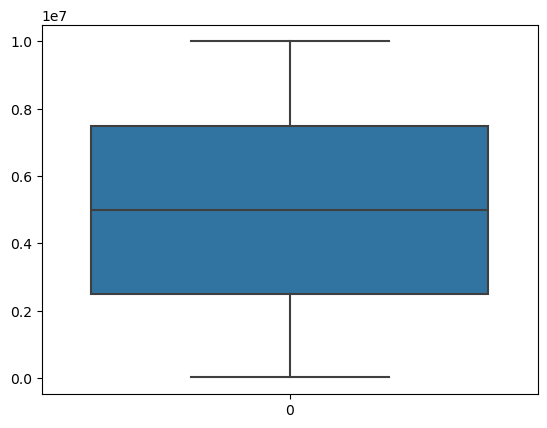

In [47]:
sns.boxplot(df['Income'])

#### top profession getting higehst pay

In [48]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [56]:
df.groupby(['Income'])['Profession'].sum().sort_index(ascending=False).head(10)

Income
9999938                                       Police_officer
9999400                                            Librarian
9999180    DrafterDrafterDrafterDrafterDrafterDrafterDraf...
9998280                                              Aviator
9998070    SecretarySecretarySecretarySecretarySecretaryS...
9996969                                              Drafter
9996947                                              Drafter
9996946                                             Designer
9996861                                         Statistician
9996192                           Computer_hardware_engineer
Name: Profession, dtype: object

In [57]:
df.sort_values(by='Income',ascending=False).head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
229019,229020,9999938,34,19,single,rented,yes,Police_officer,Panchkula,Haryana,6,13,0
225535,225536,9999400,41,11,single,rented,no,Librarian,Jaipur,Rajasthan,10,14,0
178370,178371,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
21754,21755,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
162106,162107,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
135201,135202,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
75812,75813,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
64995,64996,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
151354,151355,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0
189196,189197,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0


#### Highest experience

In [58]:
df.sort_values(by='Experience',ascending=False).head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
214948,214949,4407294,73,20,single,rented,no,Biomedical_Engineer,Surat,Gujarat,7,12,0
215081,215082,5576354,76,20,single,rented,yes,Firefighter,Dharmavaram,Andhra_Pradesh,6,10,0
189792,189793,476900,33,20,single,rented,yes,Firefighter,Saharsa[29],Bihar,7,10,0
96002,96003,6917119,44,20,married,rented,yes,Physician,South_Dumdum,West_Bengal,8,11,0
113590,113591,9845816,31,20,single,rented,no,Lawyer,Thanjavur,Tamil_Nadu,14,11,0
171409,171410,5600342,31,20,single,rented,yes,Official,Saharanpur,Uttar_Pradesh,7,12,0
79237,79238,6973369,68,20,single,rented,no,Physician,Raebareli,Uttar_Pradesh,11,13,1
113592,113593,2603179,39,20,single,rented,yes,Politician,Siwan[32],Bihar,13,11,0
215100,215101,3611839,55,20,single,rented,no,Civil_servant,Aurangabad[39],Bihar,10,12,0
153999,154000,16896,56,20,married,rented,no,Army_officer,Aligarh,Uttar_Pradesh,7,12,0


#### Check the married or singles are the not eligible for loan

AttributeError: 'numpy.int64' object has no attribute 'startswith'

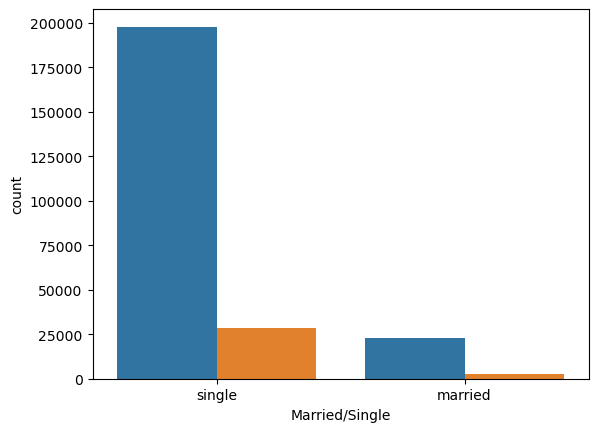

In [67]:
sns.countplot(x='Married/Single',hue='Risk_Flag',data=df)
plt.show()

#### based on city count the loan_eligble

In [75]:
df.groupby(['CITY'])['Risk_Flag'].sum().head(10)

CITY
Adoni         103
Agartala      136
Agra           81
Ahmedabad     133
Ahmednagar     38
Aizawl         94
Ajmer         115
Akola          68
Alappuzha      90
Aligarh       104
Name: Risk_Flag, dtype: int64

# Feature engineering

In [78]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [79]:
df.drop(columns='Id',inplace=True,axis=1)

In [80]:
df.head(2)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0


In [83]:
cat_cols=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
cat_cols

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

In [84]:
num_cols=[]
for i in df.columns:
    if df[i].dtypes == 'int64':
        num_cols.append(i)

num_cols

['Income',
 'Age',
 'Experience',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS',
 'Risk_Flag']

In [89]:
stc=StandardScaler()
ohe=OrdinalEncoder()

In [100]:
num_cols.remove('Risk_Flag')

In [101]:
num_cols

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Model training

In [85]:
X=df.drop(columns=['Risk_Flag'])
y=df['Risk_Flag']

In [77]:
from sklearn.model_selection import train_test_split

In [88]:
X.head(2)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13


In [87]:
X.shape,y.shape

((252000, 11), (252000,))

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 31.1+ MB


In [102]:
data_to_transform = X[num_cols]

# Initialize StandardScaler
stc = StandardScaler()

# Fit and transform the data
transformed_data = stc.fit_transform(data_to_transform)

# Replace the original columns with the transformed values
X[num_cols] = transformed_data

In [103]:
X.head(2)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356


In [106]:
X[cat_cols]=ohe.fit_transform(X[cat_cols])

In [107]:
X.head(2)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,1.0,2.0,0.0,33.0,251.0,13.0,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,1.0,2.0,0.0,43.0,227.0,14.0,0.731036,0.716356


In [108]:
y.head(2)

0    0
1    0
Name: Risk_Flag, dtype: int64

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr=LogisticRegression()

In [112]:
lr.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
lr.score(X_train,y_train)

0.8773363095238095

In [118]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [115]:
y_pred=lr.predict(X_test)

In [116]:
accuracy_score(y_pred,y_test)

0.8756547619047619

In [120]:
f1_score(y_test,y_pred)

0.0

In [119]:
precision_score(y_pred,y_test)

0.0

In [121]:
recall_score(y_pred,y_test)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [122]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
